In [514]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import numpy as np
from pprint import pprint

In [515]:
str_filename = 'dune_artblocks_mints.csv'

In [516]:
fh = open(str_filename)
csv_reader = csv.reader(fh)

In [517]:
csv_reader = csv.reader(fh)
csv_header = next(csv_reader)

In [518]:
fh.close()

In [519]:
df_temp = pd.read_csv(str_filename, header=None, skiprows=1, names=csv_header)
i = 0
for row in df_temp['time']:
    row = row.replace('+00:00', '')
    row = row.replace('T', ' ')
    df_temp.at[i, 'time'] = row
    i += 1
df_temp

,time,name,eth_total,usd_total,refund_eth,refund_usd,gas_eth,project_type,projectid,tokenid,tx_hash,mint_count
0,2022-08-09 21:30:26,Gels by Jason Brown,0.15,256.4190,0.0,0.0,0.000209,Factory,322,322000132,\x657b0e82d8e891d414e853f70eedb9a3d585b6db2b4f...,1
1,2022-08-09 21:27:20,THE SOURCE CoDE by O,0.20,341.8920,0.0,0.0,0.000153,Factory,187,187000165,\xc2b38ee0431f08dfbf60c9a371eb2759af769b17b463...,1
2,2022-08-09 21:24:21,Facets by conundrume,0.10,170.6110,0.0,0.0,0.000153,Factory,249,249000222,\x5e954524f1505cb1a71cfd6580bf7d9a248e885b6b57...,1
3,2022-08-09 21:01:56,Swing by Eltono,0.15,255.0600,0.0,0.0,0.000207,Factory,184,184000249,\x10e9f2c68f9254fa1e394b0dc98bd30c34a0ad0ba81b...,1
4,2022-08-09 17:07:06,8 by Bård Ionson,0.18,304.5492,0.0,0.0,0.000159,Factory,179,179000105,\x24a35c0cbcf342fbeded159696463339b578b65fe535...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44890,2022-01-01 03:26:49,Dream Engine by REMO,0.10,373.1310,0.0,0.0,0.014069,Factory,223,223000265,\xbdc649a4b50067b30675568bd5337b0c1356c3c019c9...,1
44891,2022-01-01 02:50:44,Freehand by WAWAA,0.12,447.8640,0.0,0.0,0.014876,Factory,211,211000164,\xf379b87e7bd9d8214790fc17e564cf545aff708f71e6...,1
44892,2022-01-01 01:11:00,CryptoNewYorker by Q,0.00,0.0000,0.0,0.0,0.021243,Factory,189,189000984,\xd50846180a99ba101219e33d4eb2b425d0bcf5530994...,1
44893,2022-01-01 00:58:00,Attraction by Jos Vr,0.15,558.3630,0.0,0.0,0.013791,Factory,229,229000312,\x68d37300a53c2d1f7c683af5bb87010bde0a0027f1ad...,1


In [520]:
df_sig = df_temp.loc[(df_temp['project_type'] == 'Curated')]
df_sig['eth_total']

4744     3.000000
4745     2.858306
4746     2.858306
4747     2.868078
4748     2.809446
           ...   
44479         NaN
44480         NaN
44481         NaN
44482         NaN
44483         NaN
Name: eth_total, Length: 12750, dtype: float64

In [527]:
#df_sig = df_sig.set_index('projectid')
df_copy = df_sig.groupby('projectid').min().reset_index()
df_date = df_copy['time']
df_sig = df_sig.groupby('projectid').max().reset_index()
df_sig = df_sig.loc[(df_sig['eth_total'] > 0)]
df_sig
df_date

0     2022-01-10 18:00:19
1     2022-01-24 18:00:57
2     2022-01-31 18:00:27
3     2022-02-07 18:16:55
4     2022-02-14 18:13:03
5     2022-03-21 17:10:53
6     2022-04-14 20:30:44
7     2022-03-29 17:29:45
8     2022-04-18 17:19:40
9     2022-04-29 16:59:53
10    2022-05-25 17:00:26
11    2022-06-08 17:00:14
12    2022-06-29 17:12:04
13    2022-07-13 17:00:17
Name: time, dtype: object

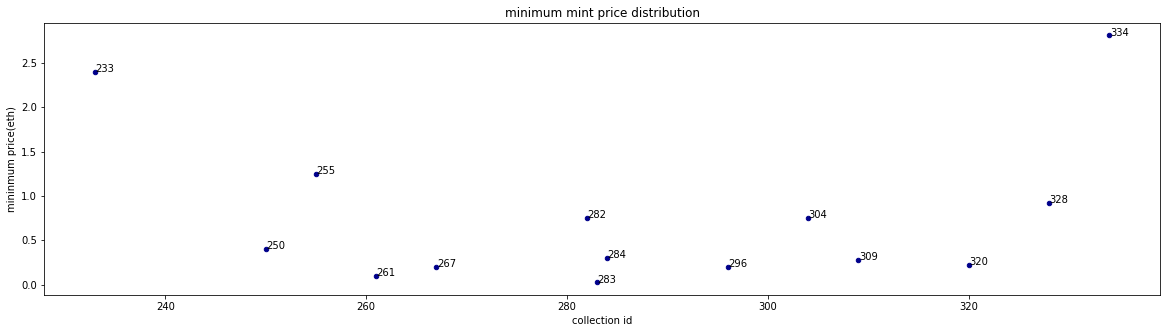

In [522]:
ax = df_sig.plot.scatter(x='projectid', y='eth_total',c='darkBlue', xlabel="collection id", ylabel="mininmum price(eth)"
                         ,title="minimum mint price distribution")
for i, txt in enumerate(df_sig.projectid):
   ax.annotate(txt, (df_sig.projectid.iat[i]+0.05, df_sig.eth_total.iat[i]))
plt.show()
#df_sig[['projectid','mint_count','projectid']].apply(lambda x: ax.text(*x),axis=1)